# **Importing Necessary Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# **Loading The Dataset**

In [2]:
train_data =pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
test_data =pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
submission =pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")

In [3]:
train_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
test_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [5]:
# #droping id
train_data.drop(columns=['id'], inplace=True)
test_data.drop(columns=['id'], inplace=True)

# **Data Distribution**

In [6]:
train_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                 

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  51012 non-null  int64  
 1   Application mode                                51012 non-null  int64  
 2   Application order                               51012 non-null  int64  
 3   Course                                          51012 non-null  int64  
 4   Daytime/evening attendance                      51012 non-null  int64  
 5   Previous qualification                          51012 non-null  int64  
 6   Previous qualification (grade)                  51012 non-null  float64
 7   Nacionality                                     51012 non-null  int64  
 8   Mother's qualification                          51012 non-null  int64  
 9   Father's qualification                 

# **Data Preperation**

***1. NULL Value and Duplicate Value***

In [9]:
print(f'Missing Train Value:{train_data.isna().sum().sum()}')
print(f'Missing Test Value:{test_data.isna().sum().sum()}')
print(f'Duplicate Train Value:{train_data.duplicated().sum().sum()}')
print(f'Duplicate Test Value:{train_data.duplicated().sum().sum()}')

Missing Train Value:0
Missing Test Value:0
Duplicate Train Value:0
Duplicate Test Value:0


> **So there are no NULL and Duplicate Values in the train and test dataset**

***2. Rename Columns***

In [10]:
train_data.columns = train_data.columns.str.lower()
test_data.columns = test_data.columns.str.lower()

In [11]:
train_data.columns

Index(['marital status', 'application mode', 'application order', 'course',
       'daytime/evening attendance', 'previous qualification',
       'previous qualification (grade)', 'nacionality',
       'mother's qualification', 'father's qualification',
       'mother's occupation', 'father's occupation', 'admission grade',
       'displaced', 'educational special needs', 'debtor',
       'tuition fees up to date', 'gender', 'scholarship holder',
       'age at enrollment', 'international',
       'curricular units 1st sem (credited)',
       'curricular units 1st sem (enrolled)',
       'curricular units 1st sem (evaluations)',
       'curricular units 1st sem (approved)',
       'curricular units 1st sem (grade)',
       'curricular units 1st sem (without evaluations)',
       'curricular units 2nd sem (credited)',
       'curricular units 2nd sem (enrolled)',
       'curricular units 2nd sem (evaluations)',
       'curricular units 2nd sem (approved)',
       'curricular units 2nd s

***Data Shape***

In [12]:
train_data.shape

(76518, 37)

In [13]:
test_data.shape

(51012, 36)

# **Exploratory Data Analysis (EDA)**

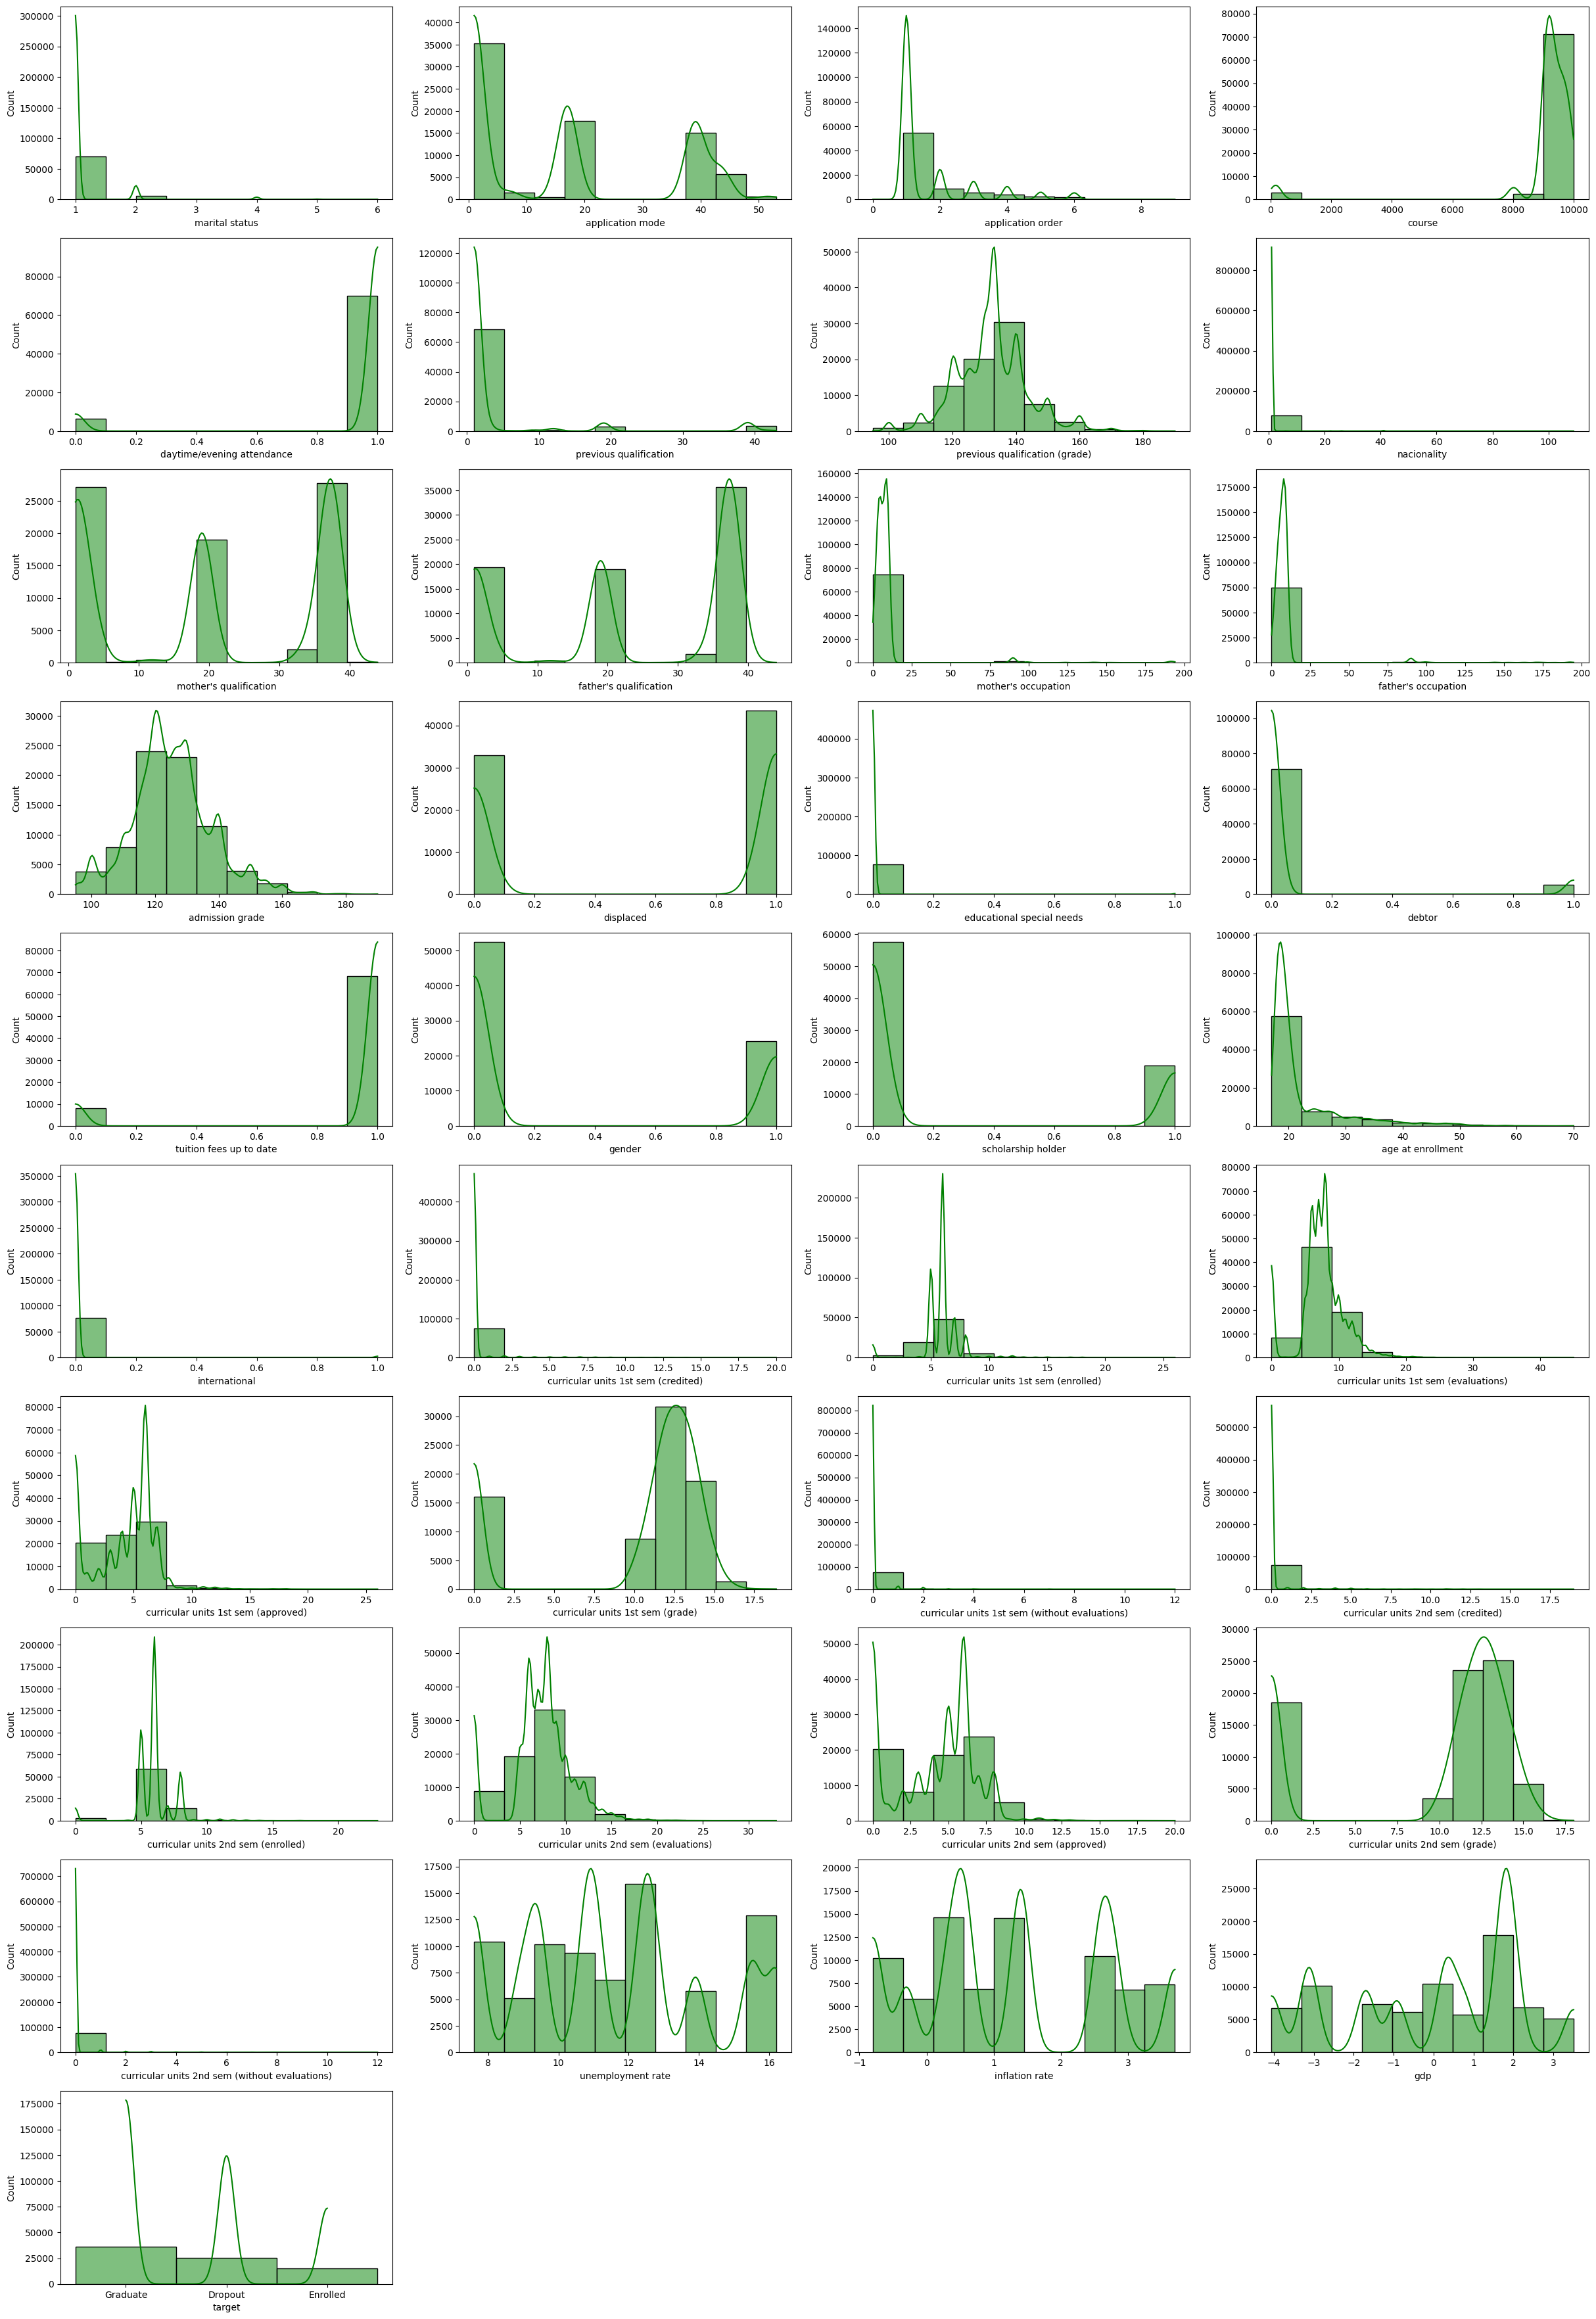

In [14]:
plt.figure(figsize = (30, 45))
for i, col in enumerate(train_data.columns):
    plt.subplot(10, 4, i+1)
    sns.histplot(data = train_data, x = col, kde = True, bins = 10, color = 'g')
plt.show()

In [15]:
target= train_data['target'].value_counts()
target

target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

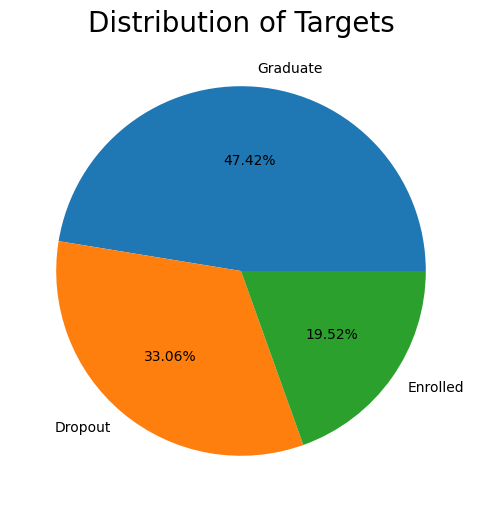

In [16]:
fig, ax = plt.subplots(figsize=(14, 6))
# Plot the pie chart
ax.set_title('Distribution of Targets', fontsize=20)
ax.pie(train_data['target'].value_counts().values,
       labels=train_data['target'].value_counts().index,
       autopct='%1.2f%%')
plt.show()

<Axes: xlabel='marital status', ylabel='count'>

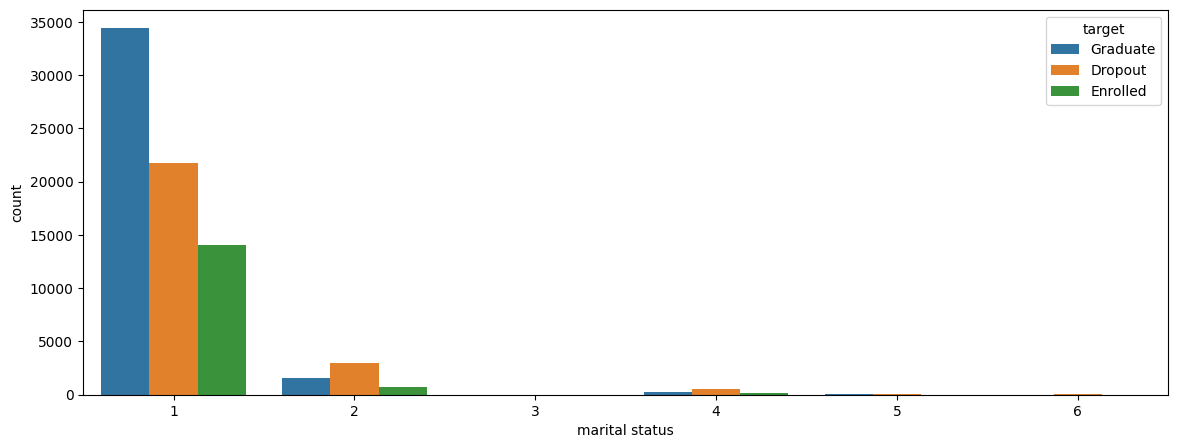

In [17]:
fig, ax = plt.subplots(figsize = (14, 5))
sns.countplot(data = train_data, x = 'marital status',hue = train_data['target'], ax = ax)

<Axes: xlabel='course', ylabel='count'>

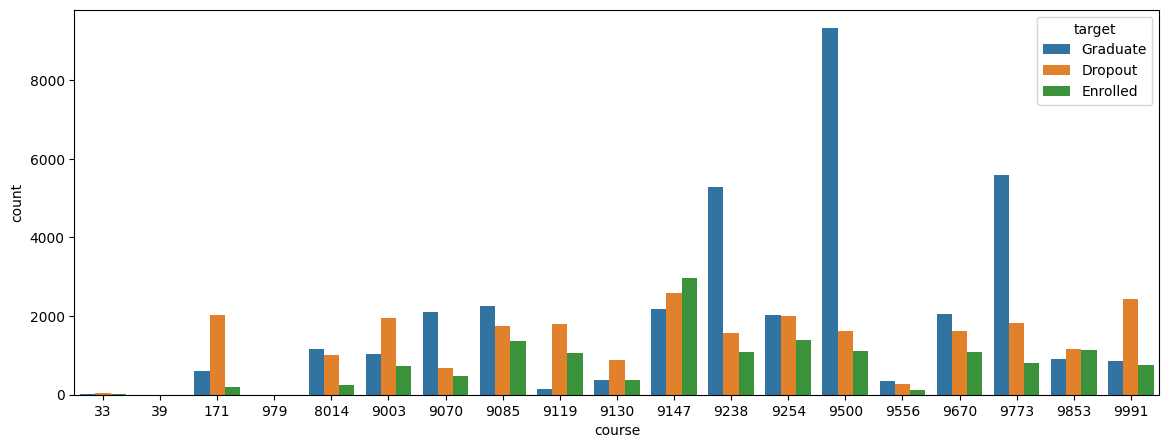

In [18]:
fig, ax = plt.subplots(figsize = (14, 5))
sns.countplot(data = train_data, x = 'course',hue = train_data['target'], ax = ax)

<Axes: xlabel='tuition fees up to date', ylabel='count'>

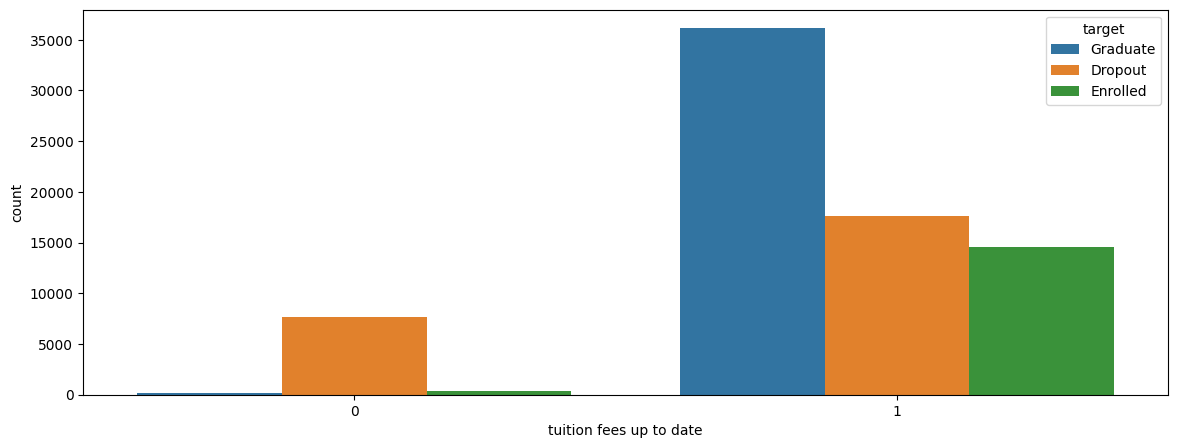

In [19]:
fig, ax = plt.subplots(figsize = (14, 5))
sns.countplot(data = train_data, x = 'tuition fees up to date',hue = train_data['target'], ax = ax)

<Axes: xlabel='gender', ylabel='count'>

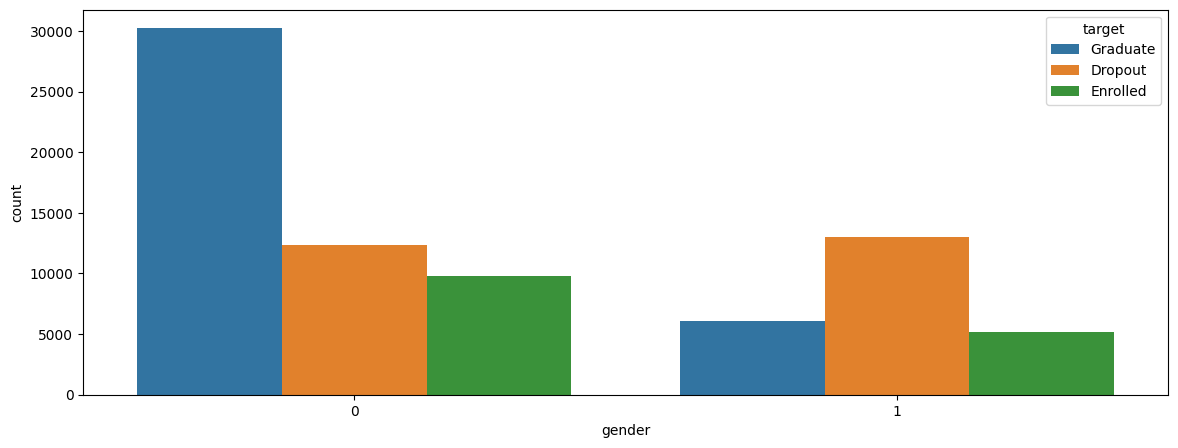

In [20]:
fig, ax = plt.subplots(figsize = (14, 5))
sns. countplot(data = train_data, x = 'gender',hue = train_data['target'], ax = ax)

<Axes: xlabel='scholarship holder', ylabel='count'>

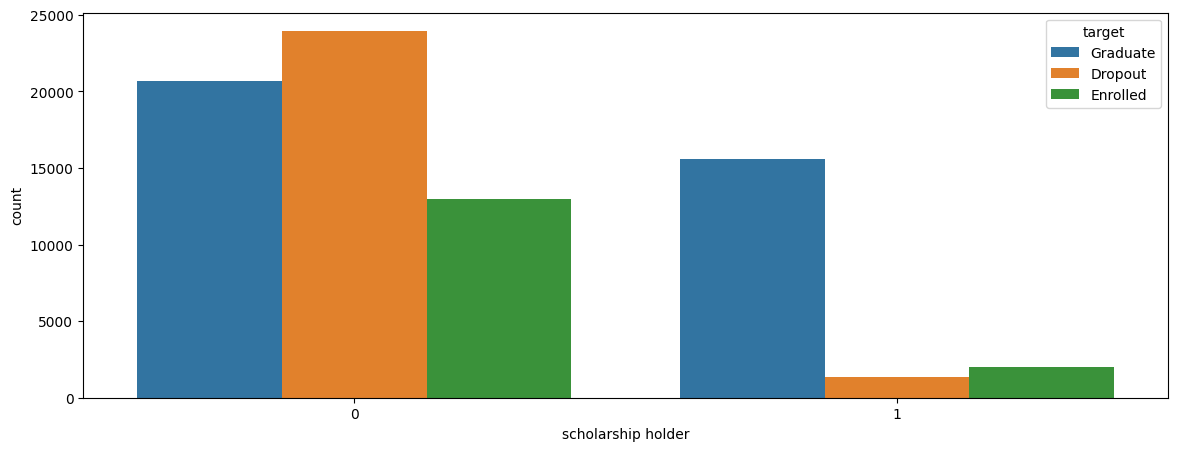

In [21]:
fig, ax = plt.subplots(figsize = (14, 5))
sns.countplot(data = train_data, x = 'scholarship holder',hue = train_data['target'], ax = ax)

<Axes: xlabel='inflation rate', ylabel='count'>

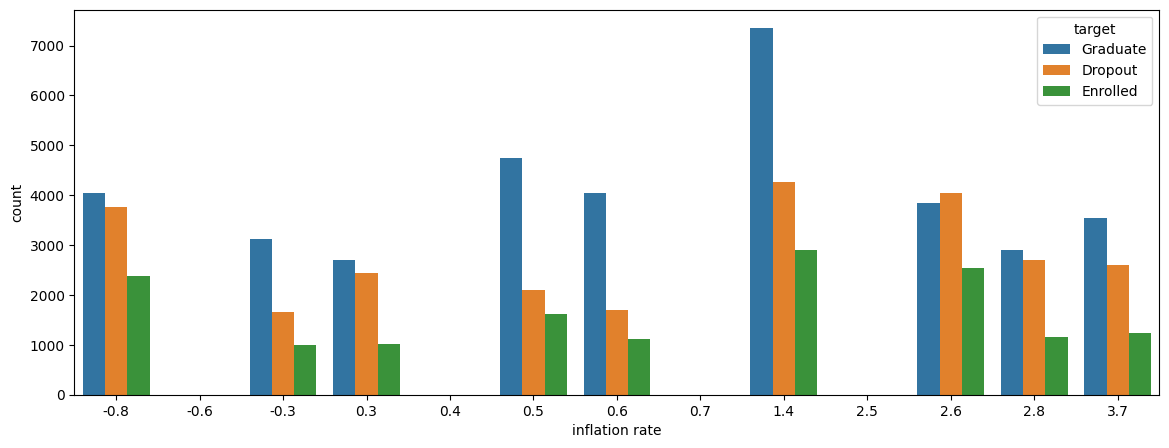

In [22]:
fig, ax = plt.subplots(figsize = (14, 5))
sns.countplot(data = train_data, x = 'inflation rate',hue = train_data['target'], ax = ax)

<Axes: xlabel='gdp', ylabel='count'>

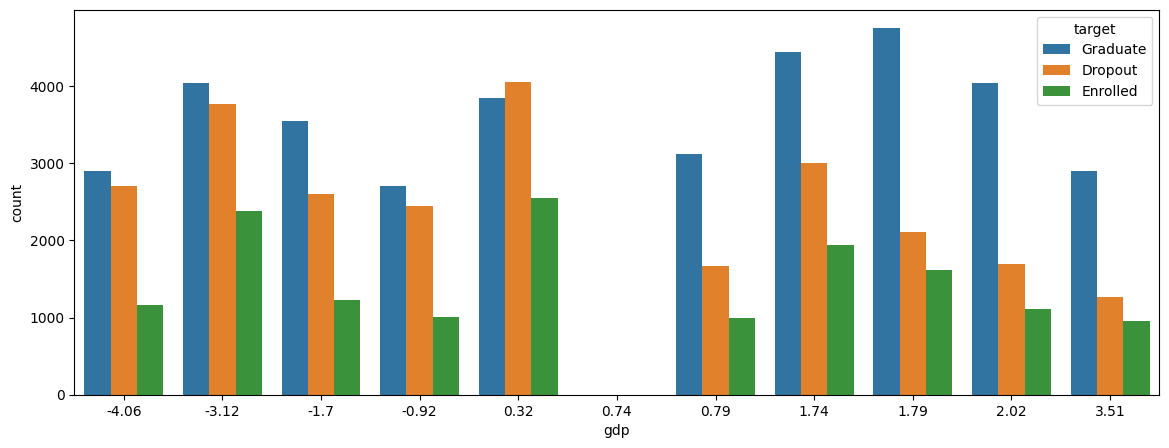

In [23]:
fig, ax = plt.subplots(figsize = (14, 5))
sns.countplot(data = train_data, x = 'gdp',hue = train_data['target'], ax = ax)

# **Findout Outlier**

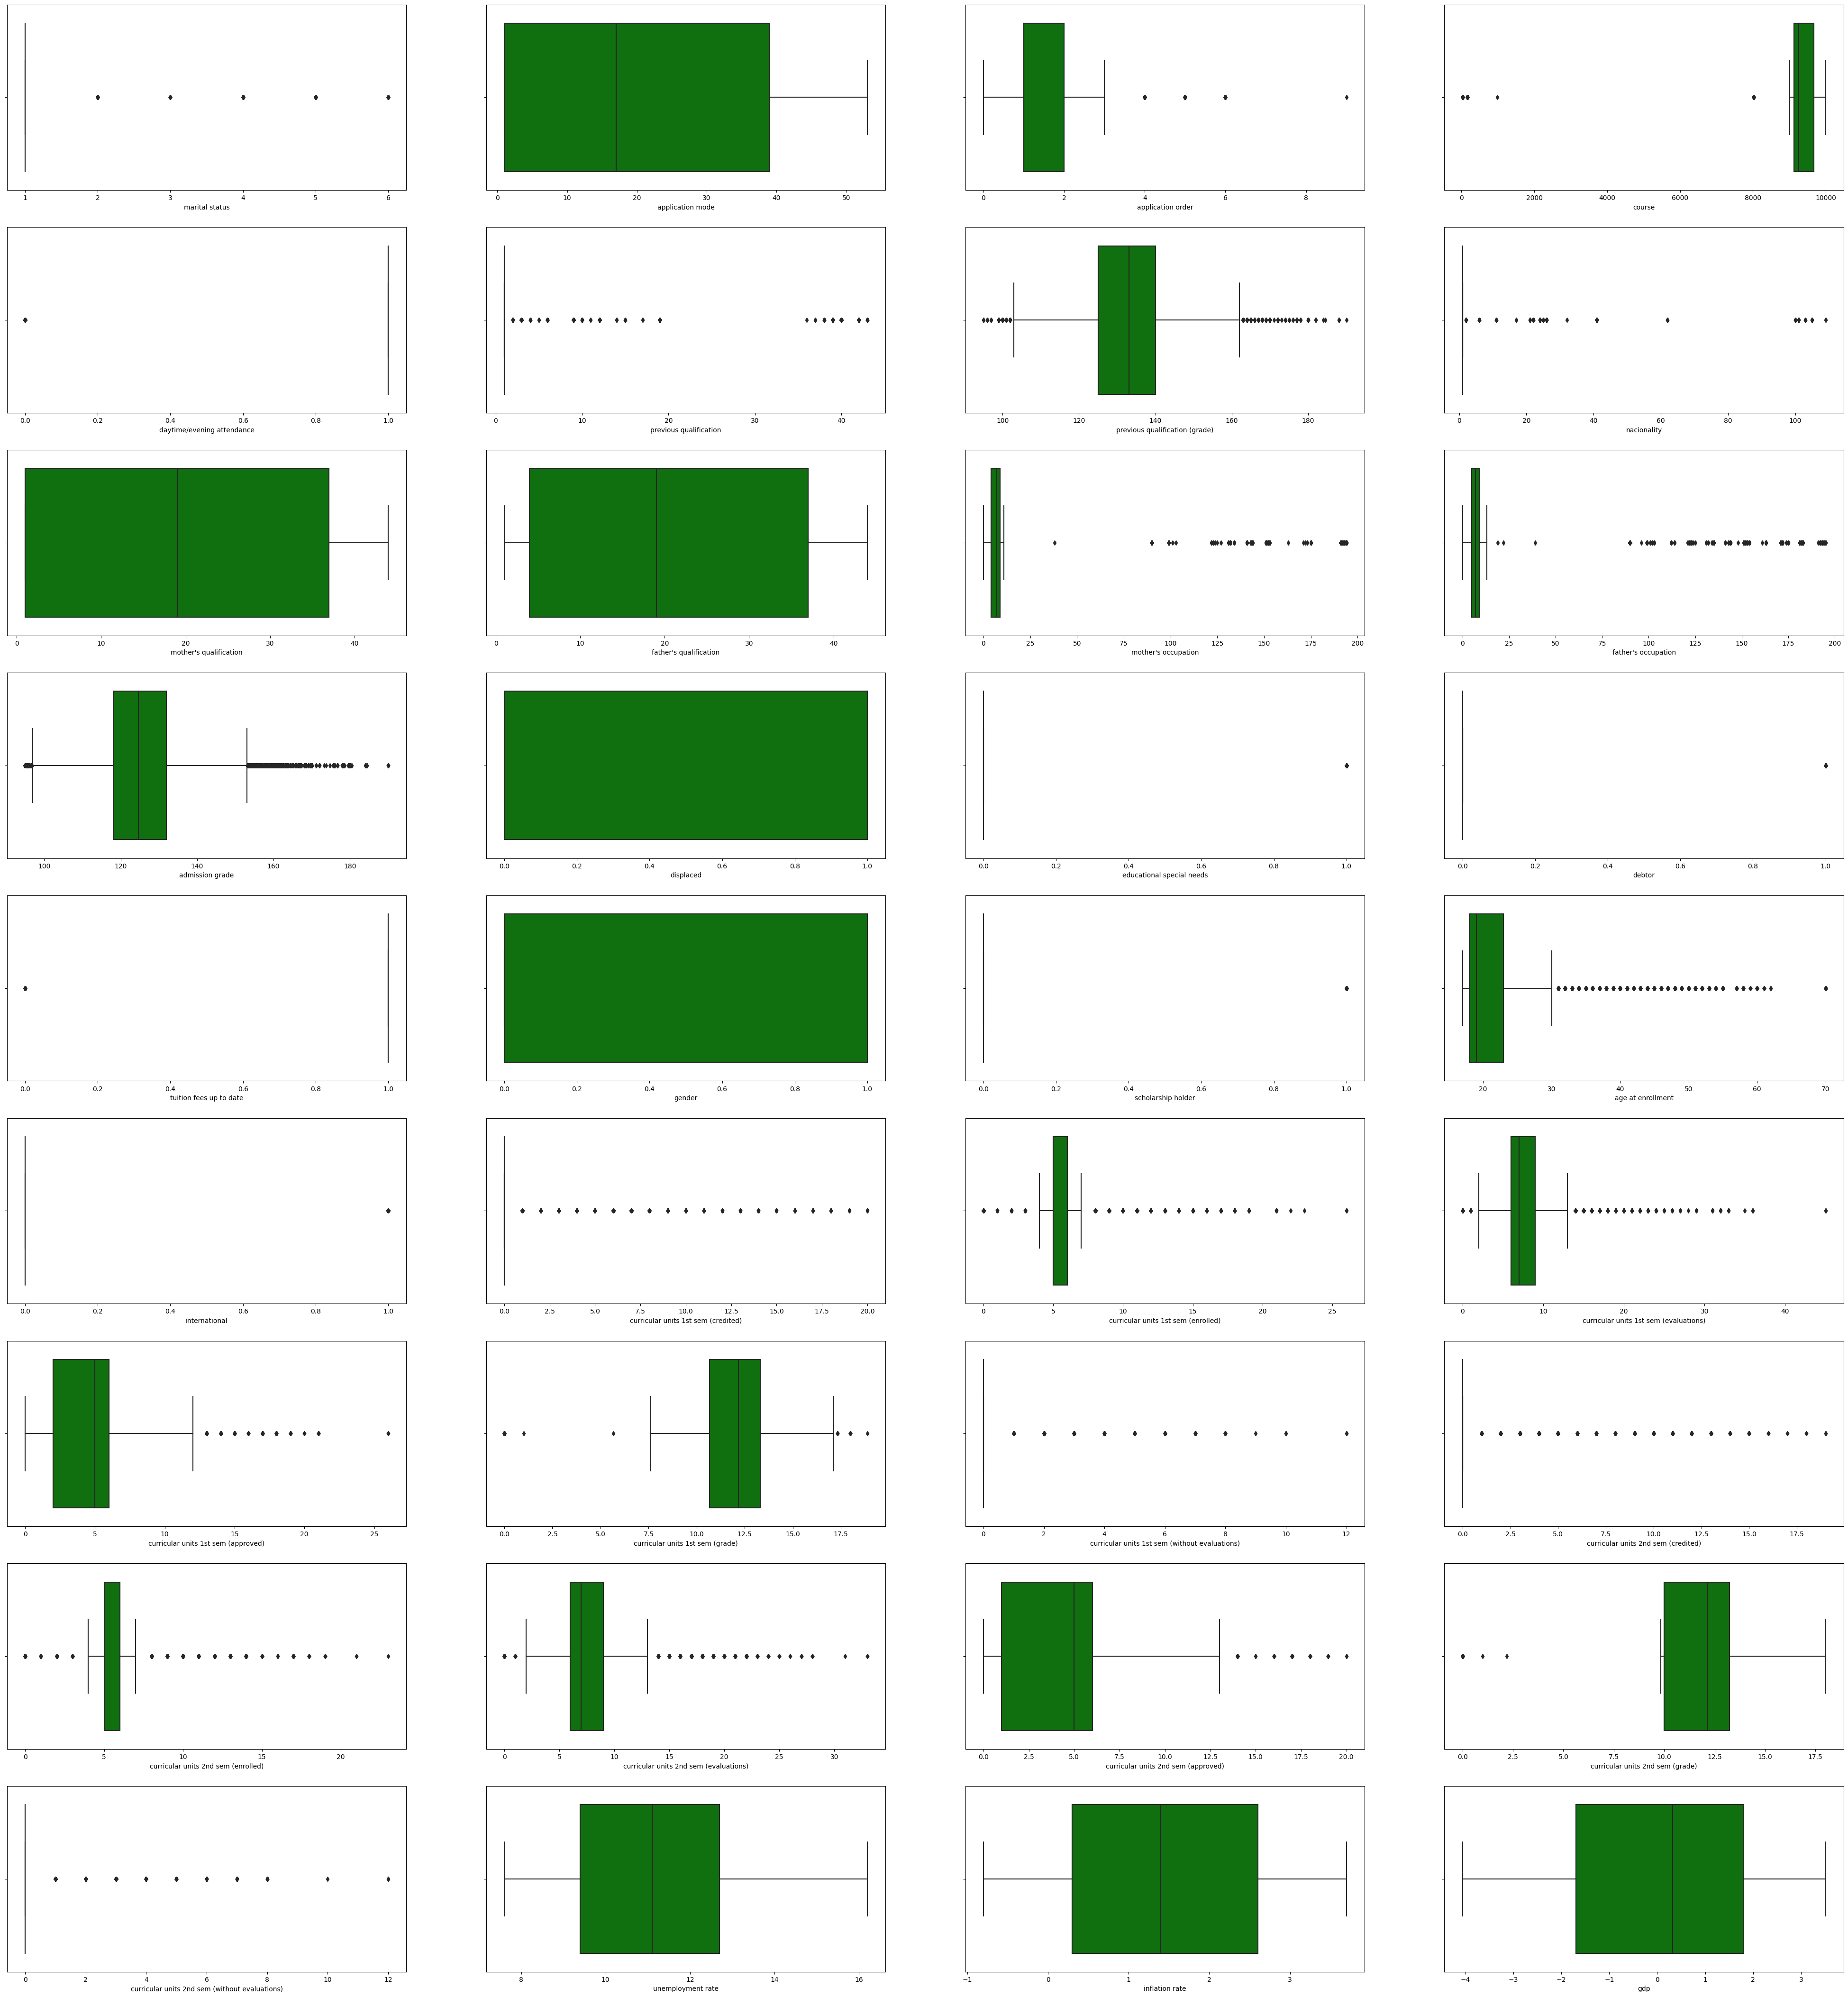

In [24]:
plt.figure(figsize = (50,60))
numeric_columns = train_data.select_dtypes(include=['number']).columns
for i, col in enumerate(numeric_columns):
    plt.subplot(10,4, i+1)
    sns.boxplot(data = train_data, x = col, color = 'g')
plt.show()

> **There are some outlier found but It is not nessary to remove this. Because which feature found outlier i see there are differnet value . If i remove the outlier it may be biased some of the time. So, that's the reason i don't remove this.**

# **Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

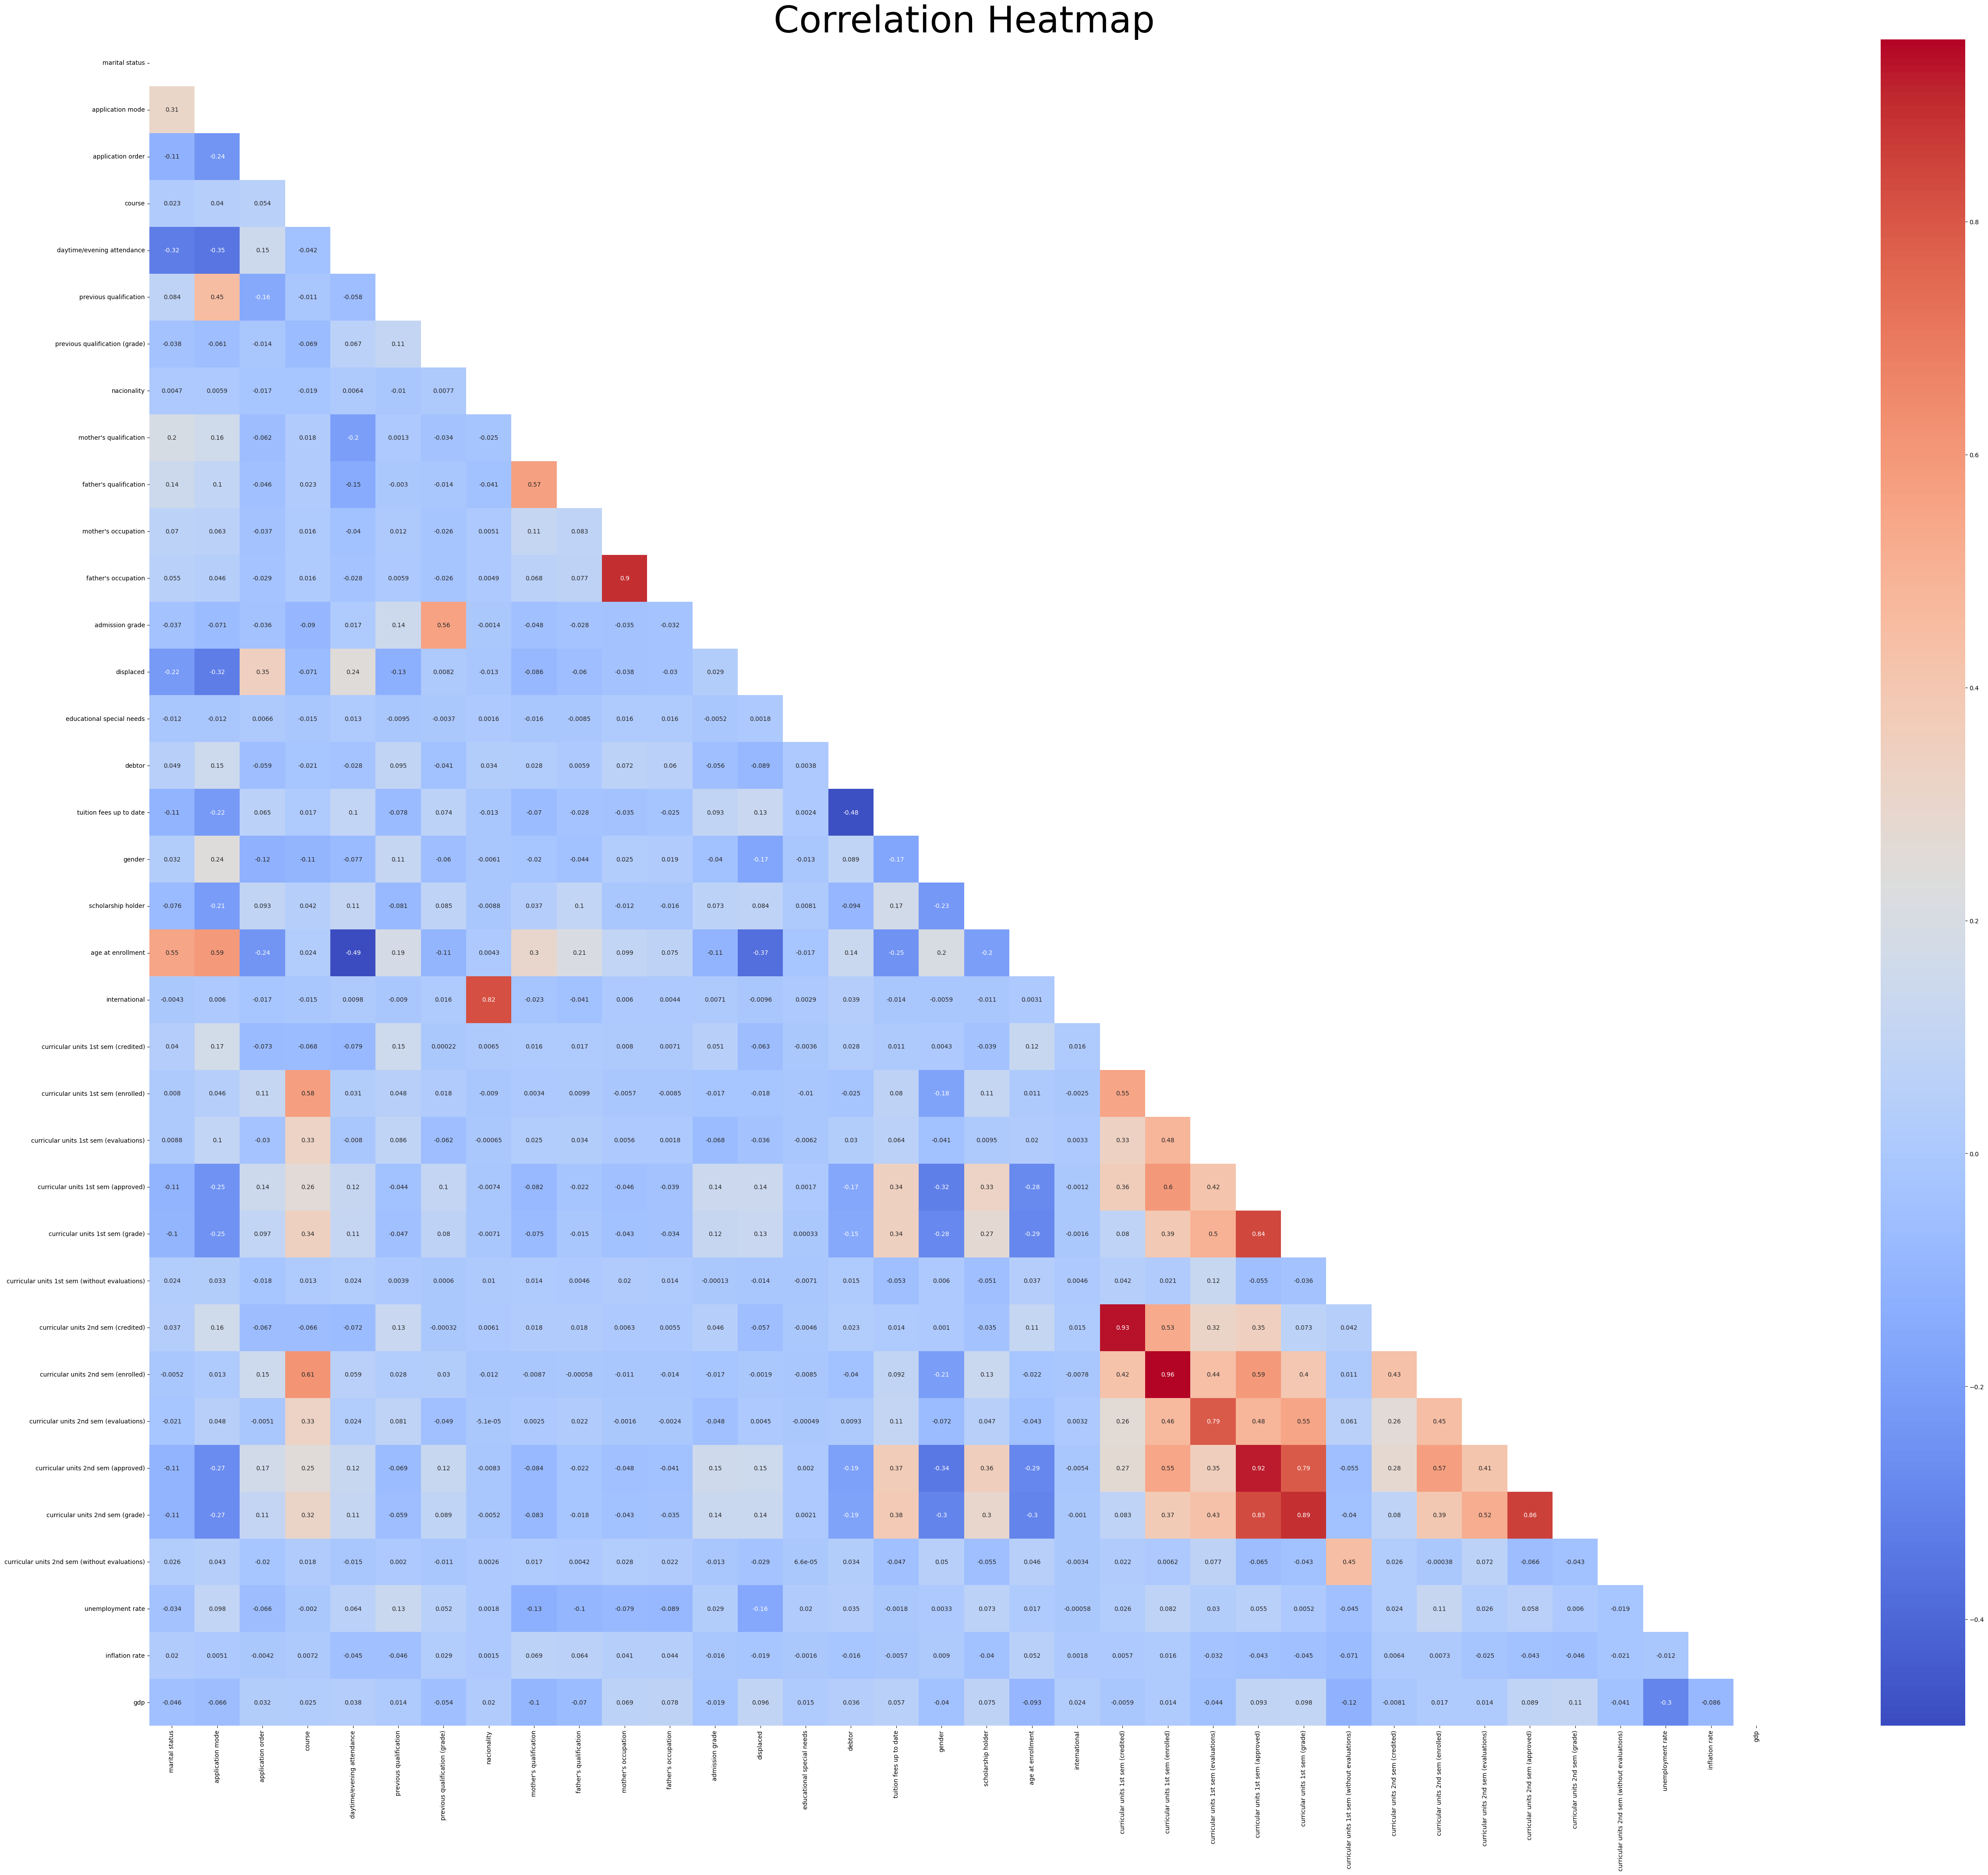

In [25]:
df_train=train_data[['marital status', 'application mode', 'application order', 'course',
       'daytime/evening attendance', 'previous qualification',
       'previous qualification (grade)', 'nacionality',
       "mother's qualification", "father's qualification",
       "mother's occupation", "father's occupation", 'admission grade',
       'displaced', 'educational special needs', 'debtor',
       'tuition fees up to date', 'gender', 'scholarship holder',
       'age at enrollment', 'international',
       'curricular units 1st sem (credited)',
       'curricular units 1st sem (enrolled)',
       'curricular units 1st sem (evaluations)',
       'curricular units 1st sem (approved)',
       'curricular units 1st sem (grade)',
       'curricular units 1st sem (without evaluations)',
       'curricular units 2nd sem (credited)',
       'curricular units 2nd sem (enrolled)',
       'curricular units 2nd sem (evaluations)',
       'curricular units 2nd sem (approved)',
       'curricular units 2nd sem (grade)',
       'curricular units 2nd sem (without evaluations)', 'unemployment rate',
       'inflation rate', 'gdp']]
f, ax = plt.subplots(figsize = (60,50))

mask = np.triu(np.ones_like(df_train.corr(), dtype = int))
cmap = sns.diverging_palette(235, 20, as_cmap = True)
sns.heatmap(df_train.corr(), annot = True, mask = mask, cmap = 'coolwarm')
plt.title('Correlation Heatmap',fontsize=60)

In [26]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(train_data, 0.80)
len(set(corr_features))

7

In [28]:
corr_features

{'curricular units 1st sem (grade)',
 'curricular units 2nd sem (approved)',
 'curricular units 2nd sem (credited)',
 'curricular units 2nd sem (enrolled)',
 'curricular units 2nd sem (grade)',
 "father's occupation",
 'international'}

> **These features are highly correlated . So that's the reason to drop these features**

# **Data Pre-processing**

In [29]:
train_new_data=train_data.drop(corr_features,axis=1)
test_new_data = test_data.drop(corr_features,axis=1)

***1. Apply Encoder for catagorical Value***

In [30]:
label_encoder = LabelEncoder()
train_new_data['target'] = label_encoder.fit_transform(train_new_data['target'])
train_new_data['target'].value_counts()

#Dropout= 0, Enrolled= 1, Graduate= 2

target
2    36282
0    25296
1    14940
Name: count, dtype: int64

# **Apply ML Model**

In [31]:
X_train_train_new_data = train_new_data.drop('target',axis=1)
y_train_train_new_data = train_new_data['target']

***Apply Standard Scaler***

In [32]:
scaler = StandardScaler() # instantiate
scaler.fit(X_train_train_new_data)
X_train_scaled = scaler.transform(X_train_train_new_data)
X_test_scaled = scaler.transform(test_new_data)

# **Random Forest Classifier**

In [33]:
model = RandomForestClassifier()
model.fit(X_train_scaled,y_train_train_new_data)

RandomForestClassifier()

In [34]:
predictions = model.predict(X_test_scaled)
predictions

array([0, 2, 2, ..., 0, 0, 0])

# **Prepare the model Train and Validation Sets**

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_train_new_data, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
val_predictions = model.predict(X_val)

accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy of Random Forest: {accuracy}')

Validation Accuracy of Random Forest: 0.8039074751698903


# **Confusion Matrix**

Validation Accuracy Score of Random Forest =80.39%
Confusion Matrix of Random Forest = 
[[4103  517  408]
 [ 429 1597  991]
 [ 162  494 6603]]
Classification Report of Random Forest =
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      5028
           1       0.61      0.53      0.57      3017
           2       0.83      0.91      0.87      7259

    accuracy                           0.80     15304
   macro avg       0.77      0.75      0.76     15304
weighted avg       0.80      0.80      0.80     15304



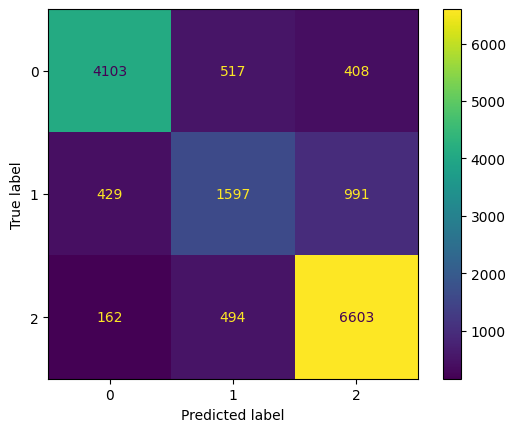

In [36]:
print(f'Validation Accuracy Score of Random Forest ={round(accuracy*100, 2)}%')
print(f'Confusion Matrix of Random Forest = \n{confusion_matrix(y_val, val_predictions)}')
print(f'Classification Report of Random Forest =\n {classification_report(y_val, val_predictions)}')

cm = confusion_matrix(y_val, val_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# **Submission**

In [37]:
# Convert numeric predictions back to categorical values
categorical_predictions = label_encoder.inverse_transform(predictions)
print(categorical_predictions)

['Dropout' 'Graduate' 'Graduate' ... 'Dropout' 'Dropout' 'Dropout']


In [38]:
# Create submission file
test_data =pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
submission = pd.DataFrame({'id': test_data['id'], 'Target': categorical_predictions})
#submission.to_csv('submission.csv', index=False)
submission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Dropout


# ***If you like this notebook please upvote. Thank You.***